In [ ]:
!pip install azure-storage-blob

In [1]:
import os

import torch
import pickle
import numpy as np
%matplotlib inline
import pandas as pd

from typing import Dict

from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from langchain.document_loaders import AzureBlobStorageContainerLoader
from dotenv import load_dotenv
import openai
import os

In [2]:
from dotenv import load_dotenv  
import os  
import openai
import os  
  

# Configure OpenAI API

AZURE_OPENAI_API_VERSION = "2023-03-15-preview"
AZURE_OPENAI_ENDPOINT ="https://cog-42as6n6i4ldsi.openai.azure.com/"
AZURE_OPENAI_API_KEY ="653103af9cd04492a2232b70327b7ce0"

# Set the ENV variables that Langchain needs to connect to Azure OpenAI
os.environ["OPENAI_API_BASE"] = os.environ["AZURE_OPENAI_ENDPOINT"] = AZURE_OPENAI_ENDPOINT
os.environ["OPENAI_API_KEY"] = os.environ["AZURE_OPENAI_API_KEY"] = AZURE_OPENAI_API_KEY
os.environ["OPENAI_API_VERSION"] = os.environ["AZURE_OPENAI_API_VERSION"] = AZURE_OPENAI_API_VERSION
os.environ["OPENAI_API_TYPE"] = "azure"

In [16]:
print(openai.api_key)
openai.api_key=os.environ["OPENAI_API_KEY"] = os.environ["AZURE_OPENAI_API_KEY"] = AZURE_OPENAI_API_KEY
openai.api_base=os.environ["OPENAI_API_BASE"] = os.environ["AZURE_OPENAI_ENDPOINT"] = AZURE_OPENAI_ENDPOINT
print(openai.api_key)
print(openai.api_base)

653103af9cd04492a2232b70327b7ce0
653103af9cd04492a2232b70327b7ce0
https://cog-42as6n6i4ldsi.openai.azure.com/


In [3]:
import pandas as pd
import io
from azure.storage.blob import BlobServiceClient

# Define the connection string and container name
conn_str = "DefaultEndpointsProtocol=https;AccountName=entchatgptstr;AccountKey=gZss7VuVlbiwShlfML34GaeAw3QYEyicbZLF9D47zkGa/GCgx6jNGcNGBz0qqRa4Ci3MPqXrWI2O+AStm9gdMg==;EndpointSuffix=core.windows.net"
container_name = "pubmeddata"

# Create a BlobServiceClient object
blob_service_client = BlobServiceClient.from_connection_string(conn_str)

# Get a reference to the blob container
container_client = blob_service_client.get_container_client(container_name)

# Get a reference to the blob
blob_client = container_client.get_blob_client("df_test_embeddings10k.csv")

# Download the blob as a string
blob_string = blob_client.download_blob().content_as_text(encoding="utf-8")

# Load the string into a Pandas dataframe
df_test = pd.read_csv(io.StringIO(blob_string), encoding="utf-8")

# Print the dataframe
print(df_test)
df_test.head(10)

     Date received                                            Product  \
0       2021-09-17  Credit reporting, credit repair services, or o...   
1       2020-05-26                                    Debt collection   
2       2022-05-01  Credit reporting, credit repair services, or o...   
3       2019-10-04  Money transfer, virtual currency, or money ser...   
4       2022-01-09  Credit reporting, credit repair services, or o...   
...            ...                                                ...   
9995    2022-11-11  Credit reporting, credit repair services, or o...   
9996    2023-05-04                                    Debt collection   
9997    2021-08-26  Credit reporting, credit repair services, or o...   
9998    2019-03-07  Credit reporting, credit repair services, or o...   
9999    2022-11-23  Credit reporting, credit repair services, or o...   

           Sub-product                                              Issue  \
0     Credit reporting  Problem with a credit 

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Embeddings_complaint
0,2021-09-17,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,MY NAME IS XXXX XXXX AND I'M SUBMITTING THIS C...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,93727,NaN,Consent provided,Web,2021-09-17,Closed with non-monetary relief,Yes,NaN,4729991,"[-0.0461684875190258, -0.018764231353998184, 0..."
1,2020-05-26,Debt collection,Credit card debt,Took or threatened to take negative or legal a...,Collected or attempted to collect exempt funds,COLLECTION AGENCIES DEMAND PAYMENT ON ACCOUNTS...,NaN,Resurgent Capital Services L.P.,CA,90018,NaN,Consent provided,Web,2020-05-26,Closed with explanation,Yes,NaN,3668941,"[-0.02608240209519863, -0.027123533189296722, ..."
2,2022-05-01,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,NaN,"EQUIFAX, INC.",AZ,85041,NaN,Consent provided,Web,2022-05-01,Closed with explanation,Yes,NaN,5523897,"[-0.02903948351740837, -0.004012380726635456, ..."
3,2019-10-04,"Money transfer, virtual currency, or money ser...",Virtual currency,Fraud or scam,NaN,On Friday XX/XX/XXXX I searched in the web XXX...,NaN,JPMORGAN CHASE & CO.,TX,75043,NaN,Consent provided,Web,2019-10-04,Closed with explanation,Yes,NaN,3395771,"[-0.01851532608270645, 0.00250532990321517, 0...."
4,2022-01-09,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"Dear Sir or Madam, I checked my personal credi...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NY,10305,NaN,Consent provided,Web,2022-01-09,Closed with explanation,Yes,NaN,5087511,"[-0.028908617794513702, -0.008078554645180702,..."
5,2022-09-17,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,This is proof Equifax is not doing a proper in...,NaN,"EQUIFAX, INC.",IL,XXXXX,NaN,Consent provided,Web,2022-09-17,Closed with explanation,Yes,NaN,5992227,"[-0.023111913353204727, -0.010436994023621082,..."
6,2022-12-09,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,This is not a duplicate nor is this complaint ...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,90277,NaN,Consent provided,Web,2022-12-09,Closed with explanation,Yes,NaN,6296745,"[-0.023795152083039284, -0.005494810175150633,..."
7,2016-09-22,Mortgage,Other mortgage,"Application, originator, mortgage broker",NaN,I contacted Wells fargo because they have a pr...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,MD,21060,NaN,Consent provided,Web,2016-09-22,Closed with explanation,Yes,No,2127486,"[-0.019727632403373718, -0.010635362938046455,..."
8,2015-11-25,Credit card,NaN,Application processing delay,NaN,Sometime in XXXX of 2015 I was approved for a ...,NaN,CAPITAL ONE FINANCIAL CORPORATION,FL,32773,NaN,Consent provided,Web,2015-11-25,Closed with explanation,Yes,No,1672639,"[-0.01234468910843134, -0.004265441559255123, ..."
9,2023-01-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I acquired my credit report and asked the cred...,NaN,"EQUIFAX, INC.",NY,11236,NaN,Consent provided,Web,2023-01-14,Closed with explanation,Yes,NaN

In [4]:
# Create a table with a distinct count oer Consumer complaint narrative
df_test.groupby('Product').size().reset_index(name='counts')

,Product,counts
0,Bank account or service,89
1,Checking or savings account,538
2,Consumer Loan,64
3,Credit card,147
4,Credit card or prepaid card,721
5,Credit reporting,229
6,"Credit reporting, credit repair services, or o...",5075
7,Debt collection,1574
8,"Money transfer, virtual currency, or money ser...",221
9,Money transfers,8


In [12]:
#count rows per column product in df
df_test.groupby('Product').size().reset_index(name='counts')
#show distinct Product names
labels=df_test['Product'].unique()
labels




array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection',
       'Money transfer, virtual currency, or money service', 'Mortgage',
       'Credit card', 'Student loan', 'Credit reporting',
       'Checking or savings account', 'Credit card or prepaid card',
       'Payday loan', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan', 'Prepaid card',
       'Bank account or service', 'Consumer Loan', 'Money transfers',
       'Other financial service'], dtype=object)

In [55]:
import ast  
  
df_test["embedding"] = df_test["embedding"].apply(ast.literal_eval)  



/tmp/ipykernel_11964/1838188372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["embedding"] = df_test["embedding"].apply(ast.literal_eval)


In [9]:
df_test.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Embeddings_complaint
0,2021-09-17,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,MY NAME IS XXXX XXXX AND I'M SUBMITTING THIS C...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,93727,NaN,Consent provided,Web,2021-09-17,Closed with non-monetary relief,Yes,NaN,4729991,"[-0.0461684875190258, -0.018764231353998184, 0..."
1,2020-05-26,Debt collection,Credit card debt,Took or threatened to take negative or legal a...,Collected or attempted to collect exempt funds,COLLECTION AGENCIES DEMAND PAYMENT ON ACCOUNTS...,NaN,Resurgent Capital Services L.P.,CA,90018,NaN,Consent provided,Web,2020-05-26,Closed with explanation,Yes,NaN,3668941,"[-0.02608240209519863, -0.027123533189296722, ..."
2,2022-05-01,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,NaN,"EQUIFAX, INC.",AZ,85041,NaN,Consent provided,Web,2022-05-01,Closed with explanation,Yes,NaN,5523897,"[-0.02903948351740837, -0.004012380726635456, ..."
3,2019-10-04,"Money transfer, virtual currency, or money ser...",Virtual currency,Fraud or scam,NaN,On Friday XX/XX/XXXX I searched in the web XXX...,NaN,JPMORGAN CHASE & CO.,TX,75043,NaN,Consent provided,Web,2019-10-04,Closed with explanation,Yes,NaN,3395771,"[-0.01851532608270645, 0.00250532990321517, 0...."
4,2022-01-09,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"Dear Sir or Madam, I checked my personal credi...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NY,10305,NaN,Consent provided,Web,2022-01-09,Closed with explanation,Yes,NaN,5087511,"[-0.028908617794513702, -0.008078554645180702,..."
5,2022-09-17,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,This is proof Equifax is not doing a proper in...,NaN,"EQUIFAX, INC.",IL,XXXXX,NaN,Consent provided,Web,2022-09-17,Closed with explanation,Yes,NaN,5992227,"[-0.023111913353204727, -0.010436994023621082,..."
6,2022-12-09,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,This is not a duplicate nor is this complaint ...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,90277,NaN,Consent provided,Web,2022-12-09,Closed with explanation,Yes,NaN,6296745,"[-0.023795152083039284, -0.005494810175150633,..."
7,2016-09-22,Mortgage,Other mortgage,"Application, originator, mortgage broker",NaN,I contacted Wells fargo because they have a pr...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,MD,21060,NaN,Consent provided,Web,2016-09-22,Closed with explanation,Yes,No,2127486,"[-0.019727632403373718, -0.010635362938046455,..."
8,2015-11-25,Credit card,NaN,Application processing delay,NaN,Sometime in XXXX of 2015 I was approved for a ...,NaN,CAPITAL ONE FINANCIAL CORPORATION,FL,32773,NaN,Consent provided,Web,2015-11-25,Closed with explanation,Yes,No,1672639,"[-0.01234468910843134, -0.004265441559255123, ..."
9,2023-01-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I acquired my credit report and asked the cred...,NaN,"EQUIFAX, INC.",NY,11236,NaN,Consent provided,Web,2023-01-14,Closed with explanation,Yes,NaN

In [19]:
import ast  
  
# Convert string values to lists of floats  
df_test['Embeddings_complaint'] = df_test['Embeddings_complaint'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)  
  
# Check the data type of values in the 'embedding' column again  
print(df_test['Embeddings_complaint'].apply(type))  


0       <class 'list'>
1       <class 'list'>
2       <class 'list'>
3       <class 'list'>
4       <class 'list'>
             ...      
9995    <class 'list'>
9996    <class 'list'>
9997    <class 'list'>
9998    <class 'list'>
9999    <class 'list'>
Name: Embeddings_complaint, Length: 10000, dtype: object


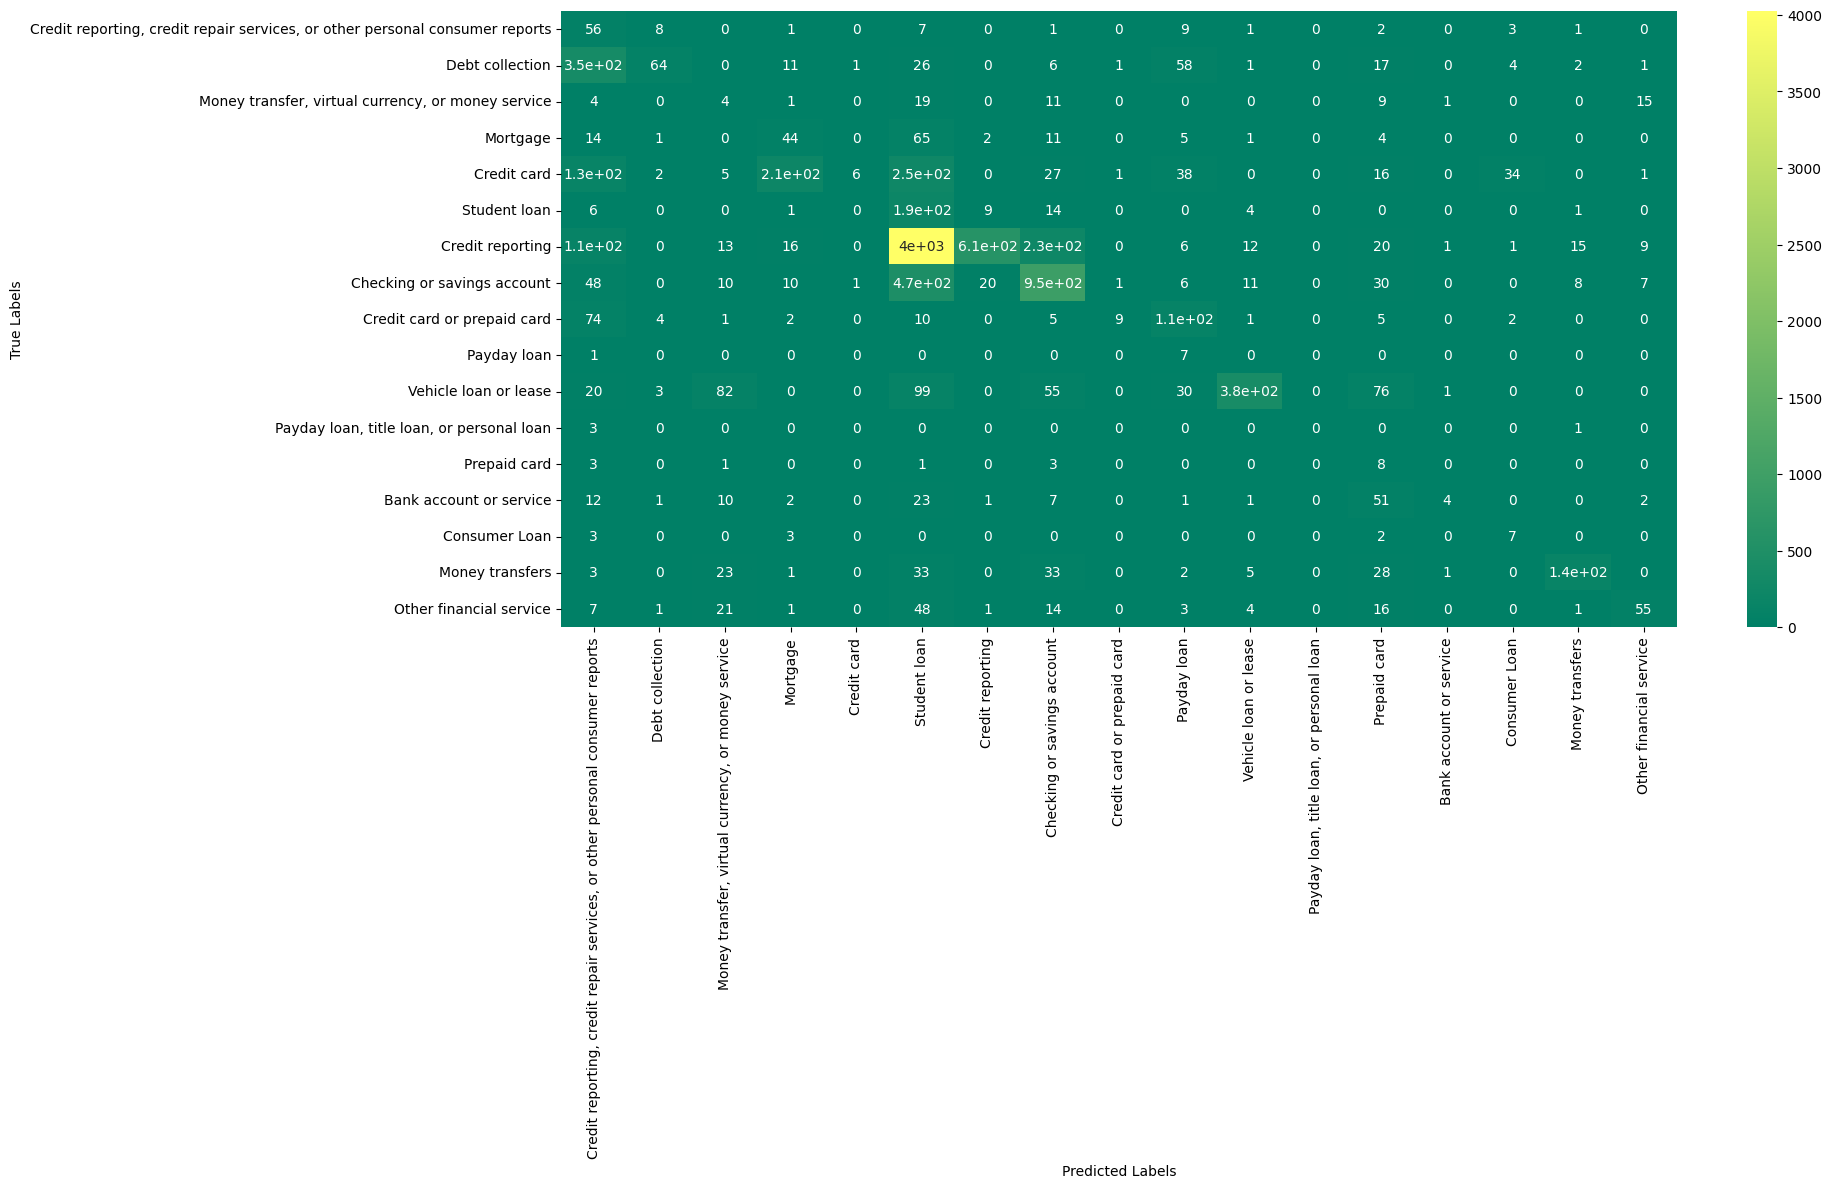

In [20]:
from openai.embeddings_utils import cosine_similarity, get_embedding
from sklearn.metrics import classification_report, PrecisionRecallDisplay
import openai
import numpy as np  
from sklearn.metrics import plot_precision_recall_curve
import seaborn as sns  
from sklearn import metrics
from langchain.embeddings import OpenAIEmbeddings

# calculate the embeddings for the labels

# Create a new column in df_train called Embeddings_complaint and use OpenAi embeddings to create the embeddings
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002", chunk_size=1)

#create embeddings for label in labels
label_embeddings = [embeddings.embed_query(label) for label in labels]

#Add an additional column called Predicted Labes to the dataframe and fill it with the predicted labels. Predicted labels are calculated by comparing the cosine similarity of the label embeddings with the embeddings of the Consumer complaint narrative. The label with the highest cosine similarity is the predicted label.
def label_score(review_embedding, label_embedding):
    review_embedding = np.array(review_embedding, dtype=np.float64)  
    label_embedding = np.array(label_embedding, dtype=np.float64)  
    return cosine_similarity(review_embedding, label_embedding)

#Add an additional column called predicted labels to the dataframe using the label_score function
df_test["predicted_label"] = df_test["Embeddings_complaint"].apply(lambda x: labels[np.argmax([label_score(x, label_embedding) for label_embedding in label_embeddings])])

# # Plot the confusion matrix
plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(df_test["Product"], df_test["predicted_label"]), annot = True, xticklabels = df_test["Product"].unique(), yticklabels = df_test["Product"].unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
  
# Assuming you have already loaded the dataframe 'df' with the relevant data  
  
# Extract the ground truth labels (actual products) and the predicted labels  
y_true = df_test['Product']  
y_pred = df_test['predicted_label']  
  
# Calculate evaluation metrics  
accuracy = accuracy_score(y_true, y_pred)  
precision = precision_score(y_true, y_pred, average='weighted')  
recall = recall_score(y_true, y_pred, average='weighted')  
f1 = f1_score(y_true, y_pred, average='weighted')  
  
# Print the evaluation results  
print("Accuracy:", accuracy)  
print("Precision:", precision)  
print("Recall:", recall)  
print("F1-score:", f1)  


Accuracy: 0.254
Precision: 0.8119635839920346
Recall: 0.254
F1-score: 0.30399693360425156


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.metrics import classification_report  
  
# Assuming you have already loaded the dataframe 'df' with the relevant data  
  
# Extract the ground truth labels (actual products) and the predicted labels  
y_true = df_test['Product']  
y_pred = df_test['predicted_label']  
  
# Generate a classification report  
report = classification_report(y_true, y_pred)  
  
# Print the classification report  
print(report)   

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.07      0.63      0.12        89
                                                 Checking or savings account       0.76      0.12      0.21       538
                                                               Consumer Loan       0.02      0.06      0.03        64
                                                                 Credit card       0.14      0.30      0.20       147
                                                 Credit card or prepaid card       0.75      0.01      0.02       721
                                                            Credit reporting       0.04      0.85      0.07       229
Credit reporting, credit repair services, or other personal consumer reports       0.95      0.12      0.21      5075
                                                       

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
